In [54]:
import numpy as np
import pandas as pd 
import pickle as pk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report


In [55]:
BMI_data = pd.read_csv("obesity_modified.csv")

X = BMI_data.iloc[:,:5]
y = BMI_data.iloc[:,5]

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,stratify=y,test_size=0.2)

In [56]:
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('pca',PCA()),
    ('classifier',RandomForestClassifier(criterion='gini',random_state=42))
])

param_grid = {
    'classifier__max_depth' : [2,3,5],
    'pca__n_components' : [2,3]
}

crossV = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

best_model = GridSearchCV(
    estimator = pipeline,
    param_grid = param_grid,
    cv = crossV,
    scoring = 'f1_macro',
    verbose = 1
)

best_model.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'classifier__max_depth': [2, 3, ...], 'pca__n_components': [2, 3]}"
,scoring,'f1_macro'
,n_jobs,None
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [57]:
best_f1Score =best_model.score(X_test,y_test)
print(f'Best f1-Score : {best_f1Score:0.2f}')

for key,value in best_model.best_params_.items():
    print(f"best {key} : {value}")

Best f1-Score : 0.91
best classifier__max_depth : 5
best pca__n_components : 2


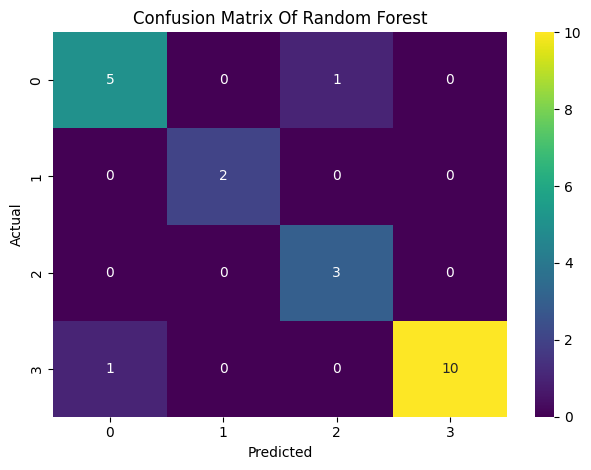

In [58]:
y_pred = best_model.predict(X_test)
conf_mat = confusion_matrix(y_pred,y_test)
sns.heatmap(conf_mat,annot=True,cmap='viridis')
plt.title("Confusion Matrix Of Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [59]:
with open('Classification Report','w') as file:
    file.write("----------------Classification Report Summary-----------------\n")
    file.write(classification_report(y_test,y_pred))

In [ ]:
# Save the model and encoder for depolyment step
filename = 'model.pkl'
pk.dump(best_model,open(filename,'wb'))